In [156]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [157]:
df1 = pd.read_csv('C:/1차data/1-7기최종.csv', encoding="cp949",index_col=0)
df1

,고객번호,증감확인,성별,연령대,이용횟수,경쟁사이용횟수,멤버쉽보유,가구류cv,레저취미cv,생활잡화cv,식료품cv,의류잡화cv,전자제품cv,화장품cv,전문품CV_S,객단가증감지수,RFM
0,1,0,2.154912,1.998566,-0.423501,3.785326,-0.703766,0.002439,-0.143935,-1.026252,-0.290543,6.229728,0.190752,0.360132,0.254600,0.000111,7
1,2,0,2.154912,1.998566,-0.423501,1.829441,-0.703766,0.188818,2.108416,-0.915864,-0.122345,-0.007482,1.612202,1.127221,0.961297,0.000111,7
2,3,1,2.154912,1.998566,-0.423501,-0.405857,-0.703766,-1.337367,-1.311525,-0.418271,-0.814849,-1.198047,0.137207,-1.519056,-0.923507,0.000111,6
3,4,1,-0.464056,1.998566,-0.423501,0.432380,-0.703766,0.159897,-0.280936,0.586511,-0.500819,-0.162726,-1.043684,-0.334804,-0.923507,0.000111,8
4,6,1,-0.464056,1.998566,-0.423501,-0.405857,-0.703766,-0.032283,-0.552529,0.015771,-0.267443,0.334575,-1.043684,2.395674,0.189537,-1.393780,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,19333,0,-0.464056,-2.144283,-0.085040,-0.405857,1.420926,-1.337367,-0.552532,-0.963124,-0.669995,-1.198047,-1.043684,-1.519056,-0.923507,-1.393780,7
18874,19334,0,2.154912,-1.108571,-0.423501,7.976510,1.420926,0.003426,0.418127,-0.074518,-0.919521,-0.133120,0.137207,-0.371416,-0.923507,0.697056,7
18875,19335,1,-0.464056,-1.108571,-0.423501,-0.405857,1.420926,2.159328,-0.230688,-0.399904,-0.277684,0.438848,-1.043684,0.022997,-0.923507,-0.696834,8
18876,19336,1,-0.464056,-1.108571,-0.423501,-0.405857,-0.703766,-0.265549,-1.311525,-1.088695,-1.329492,0.219266,-1.043684,-0.340611,0.613530,-0.696834,5


In [158]:
df2 = pd.read_csv('C:/1차data/1-8기최종.csv', encoding="cp949",index_col=0)
df2

,고객번호,증감확인,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,전문품CV_S,생활잡화CV_S,식료품CV_S,의류잡화CV_S,화장품CV_S,가구류CV_S,레저취미CV_S,전자제품CV_S,객단가증감률,RFM
0,1,0,2.156039,1.998229,3.784157,-0.652472,-0.424659,0.267363,2.170713,-0.045926,-1.448342,-0.363105,0.736138,0.279975,0.588740,-0.670022,7
1,2,0,2.156039,1.998229,1.828781,-0.652472,-0.424659,0.948328,1.077796,-0.397899,-0.595789,-1.006358,-0.123062,-1.159604,-0.158214,-0.670022,9
2,3,0,2.156039,1.998229,-0.405935,-0.652472,-0.424659,-0.976372,-0.148326,0.350685,3.432013,-1.692524,-1.625508,-1.815644,1.170227,0.000107,4
3,4,0,-0.463814,1.998229,0.432083,-0.652472,-0.424659,1.449001,-0.778109,-0.160224,-0.464030,0.206798,0.088640,0.268642,-1.264607,-0.670022,8
4,6,1,-0.463814,1.998229,-0.405935,-0.652472,-0.424659,0.199393,-0.610344,-0.105704,-0.711152,-0.852221,0.731873,1.163341,-1.264607,-1.340151,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,-0.463814,-2.144017,-0.405935,1.068660,-0.084953,-0.976372,1.803593,0.761709,3.432013,-1.692524,-1.625508,1.588049,-1.264607,-0.670022,4
18862,19334,0,2.156039,-1.108456,7.974248,1.068660,-0.424659,-0.976372,0.021781,1.508199,0.751998,0.258188,0.181109,-0.557044,1.170227,-2.010280,7
18863,19335,1,-0.463814,-1.108456,-0.405935,1.068660,-0.424659,-0.976372,-0.187145,-0.304581,-0.465980,-0.157816,-0.684492,-0.032609,-1.264607,0.670236,9
18864,19336,1,-0.463814,-1.108456,-0.405935,-0.652472,-0.424659,0.305254,1.766253,3.283349,-0.477107,-0.063757,1.303824,-1.815644,-1.264607,-0.670022,5


<AxesSubplot:>

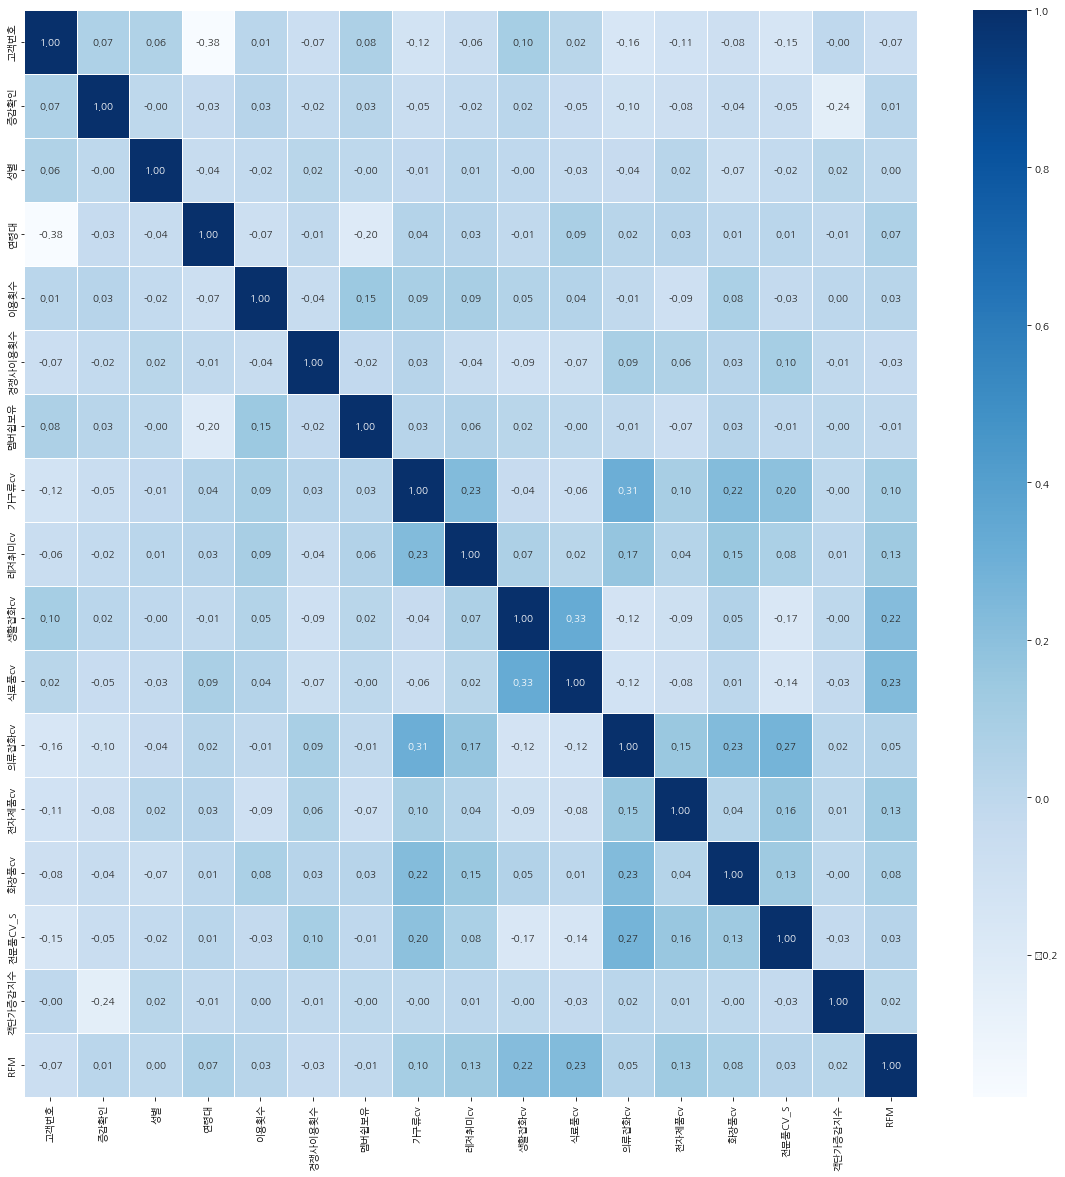

In [159]:
plt.figure(figsize=(20,20))
sns.heatmap(data =df1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [87]:
# plt.figure(figsize=(20,20))
# sns.heatmap(data =df2.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')

In [185]:
X_train=df1.drop(['고객번호','증감확인'],axis=1)

y_train=df1[['증감확인']]

X_test=df2.drop(['고객번호','증감확인'],axis=1)

y_test=df2[['증감확인']]


In [173]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)
# pred = rf_clf.predict(X_test)
# accuracy = accuracy_score(y_test,pred)





# params = {
#     'n_estimators':[10,50,100],
#     'max_depth' : [6,8,10,12],
#    'min_samples_leaf' : [8,12,18],
#     'min_samples_split' : [8,14,20]
# }
# grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
# grid_cv.fit(X_train,y_train)

# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print(accuracy_score(y_train,rf_clf.predict(X_train)))
print(accuracy_score(y_test,rf_clf.predict(X_test)))

1.0
0.5606381850948797


In [183]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals,verbose=False)

print(accuracy_score(y_train,lgbm.predict(X_train)))
print(accuracy_score(y_test,lgbm.predict(X_test)))

0.8806017586608751
0.555019612000424
